# Naive Baseline model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from dateutil.parser import parse

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

In [2]:
df = pd.read_csv('timeseries_train.csv', index_col='DATE', parse_dates=True)
df.rename(columns={"HourlyDryBulbTemperature": "temp", "datetime_beginning_utc":"Date"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.dtypes

Date       datetime64[ns]
mw                float64
year                int64
month               int64
day                 int64
weekday             int64
hour                int64
temp                int64
dtype: object

You saw that temperature had a quadratic-looking relationship with energy usage in the previous section.
### Build a squared (quadratic) temperature variable to put into a linear regression model in the coming steps. 

In [4]:
mu_temp = df['temp'].mean()  
s_temp = df['temp'].std()
print(f"mean temp^2: {mu_temp}, stdev: {s_temp}")
df['temp_norm'] = (df['temp'] - mu_temp) / s_temp
df['temp_norm2'] = df['temp_norm'] * df['temp_norm']
df.head()

mean temp^2: 53.44765187419216, stdev: 18.8704042809213


,Date,mw,year,month,day,weekday,hour,temp,temp_norm,temp_norm2
DATE,,,,,,,,,,
2017-02-01 05:00:00,2017-02-01 05:00:00,1419.881,2017,2,1,2,5,36,-0.924604,0.854893
2017-02-01 06:00:00,2017-02-01 06:00:00,1379.505,2017,2,1,2,6,36,-0.924604,0.854893
2017-02-01 07:00:00,2017-02-01 07:00:00,1366.106,2017,2,1,2,7,34,-1.030590,1.062116
2017-02-01 08:00:00,2017-02-01 08:00:00,1364.453,2017,2,1,2,8,33,-1.083583,1.174152
2017-02-01 09:00:00,2017-02-01 09:00:00,1391.265,2017,2,1,2,9,34,-1.030590,1.062116


### Build an ordinary least squares (OLS) linear regression model on your training data to predict energy using the variables just described.
You will want to treat hour of day, day of week, and month of year as categorical variables.
Although it is definitely not a perfect measure of how well your model did, what is the adjusted R-squared of this model?


### Calculate the predictions (or fitted values) from your final linear regression model on your training data set. Calculate the MAPE for these predictions from your training data set.

Mean Absolute Percentage Error (MAPE)

\begin{align}
{\mbox{M}}={\frac {1}{n}}\sum _{{t=1}}^{n}\left|{\frac {A_{t}-F_{t}}{A_{t}}}\right| * 100
\end{align}


## Note: the Sklearn linear regression underperformed; including it here for historical interest

In [5]:
predictors = ['temp_norm', 'temp_norm2', 'month','weekday', 'hour', 'day']
outcome = 'mw'
model = LinearRegression()
model.fit(X=df.filter(items=predictors), y=df[outcome])
print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')
print(f"R^2: {model.score(X=df.filter(items=predictors), y=df[outcome])}")
fitted = model.predict(df[predictors])
df['fitted'] = fitted
df['APE'] = np.abs((df['mw'] - df['fitted']) / df['mw'])*100
print("Training Naive Model MAPE is: ", df['APE'].mean())

Intercept: 1334.151
Coefficients:
 temp_norm: 116.90109892646224
 temp_norm2: 138.87175901307455
 month: 2.7368669894289286
 weekday: -18.74549123745263
 hour: 11.251894419163918
 day: -0.2728830016354531
R^2: 0.44777092740093194
Training Naive Model MAPE is:  10.68808456154412


In [6]:
results = sm.OLS.from_formula('mw ~ temp_norm + temp_norm2  + C(weekday) + C(hour) + C(month) + C(day)', 
                              data=df).fit()
df['fitted'] = results.fittedvalues
df['APE'] = abs((df['mw'] - df['fitted'])/df['mw'])*100
print("Training Naive Model MAPE is: ", df['APE'].mean())
print(results.summary())

Training Naive Model MAPE is:  6.9345730566213035
                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1016.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:00:10   Log-Likelihood:            -1.6341e+05
No. Observations:               25531   AIC:                         3.270e+05
Df Residuals:                   25458   BIC:                         3.276e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In the previous section you also noticed that temperature might have a different relationship with energy during different months of the year. 
### Plot the scatter plot between energy and temperature (as in the previous section), but only for the months of January and July.

    Compare the pattern between the months that you see here.
    It might help to overlay the plots from each month to help with this.


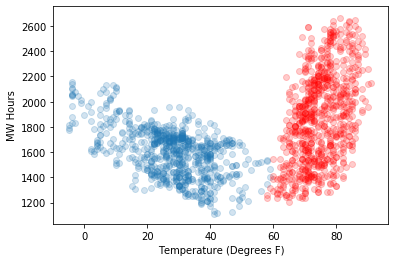

In [7]:
plt.scatter(df.query(" Date > '2019-01' and Date < '2019-02' ")['temp'], 
            df.query(" Date > '2019-01' and Date < '2019-02' ")['mw'], alpha = 0.2)
plt.scatter(df.query(" Date > '2019-07' and Date < '2019-08' ")['temp'], 
            df.query(" Date > '2019-07' and Date < '2019-08' ")['mw'], alpha = 0.2, color='r')
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.show()

In the previous section, you also noticed that temperature might have a different relationship with energy during different times of the day. 
### Plot the scatter plot between energy and temperature (as in the previous section), but only for the hours of midnight and noon.

    Compare the pattern between the hours that you see here.
    It might help to overlay the plots from each month to help with this.


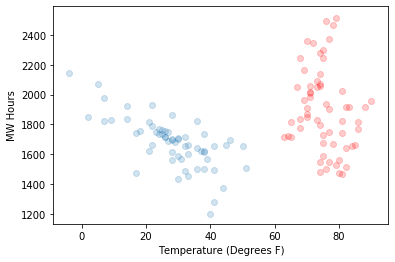

In [8]:
plt.scatter(df.query(" Date > '2019-01' and Date < '2019-02' and hour in [0,12]")['temp'], 
            df.query(" Date > '2019-01' and Date < '2019-02' and hour in [0,12]")['mw'], alpha = 0.2)
plt.scatter(df.query(" Date > '2019-07' and Date < '2019-08' and hour in [0,12]")['temp'], 
            df.query(" Date > '2019-07' and Date < '2019-08' and hour in [0,12] ")['mw'], alpha = 0.2, color='r')
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.show()

### Let's tie day & temp together and month & temp

In [9]:
results = sm.OLS.from_formula('mw ~ temp_norm*C(hour) + temp_norm2*C(hour) + temp_norm*C(month) + temp_norm2*C(month) + C(weekday)*C(hour)', 
                              data=df).fit()
# print(results.summary())
df['fitted'] = results.fittedvalues
df['APE'] = abs((df['mw'] - df['fitted'])/df['mw'])*100
print("Training Naive Model MAPE is: ", df['APE'].mean())

Training Naive Model MAPE is:  4.621830937854193


## Let's not forget day

In [10]:
results = sm.OLS.from_formula('mw ~ temp_norm*C(hour) + temp_norm2*C(hour) + temp_norm*C(month) + temp_norm2*C(month) + C(weekday)*C(hour) + temp_norm2*C(day) + temp_norm*C(day)', 
                              data=df).fit()
df['fitted'] = results.fittedvalues
df['APE'] = abs((df['mw'] - df['fitted'])/df['mw'])*100
print("Training Naive Model MAPE is: ", df['APE'].mean())
print(results.summary())

Training Naive Model MAPE is:  4.512643035356547
                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     543.2
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:00:12   Log-Likelihood:            -1.5370e+05
No. Observations:               25531   AIC:                         3.081e+05
Df Residuals:                   25192   BIC:                         3.108e+05
Df Model:                         338                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

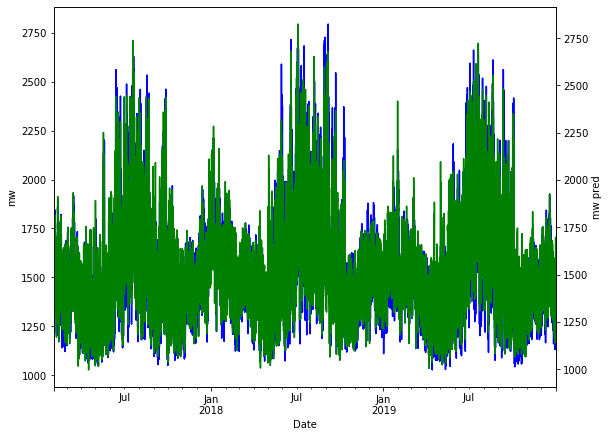

In [11]:
ax1 = df['mw'].plot(color = 'blue', figsize=(9,7))
ax1.set_ylabel('mw')
ax1.set_xlabel('Date')
ax2 = ax1.twinx()
ax2 = df['fitted'].plot(color = 'green', figsize=(9,7))
ax2.set_ylabel('mw pred')
plt.show()

In [12]:
df['residuals'] = df['mw'] - df['fitted']
df.to_csv('timeseries_train.residuals.csv')

In [13]:
test_df = pd.read_csv('timeseries_test.csv')
test_df.rename(columns={"HourlyDryBulbTemperature": "temp", "datetime_beginning_utc":"Date"}, inplace=True)
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['month'] = pd.DatetimeIndex(test_df['Date']).month
test_df['day'] = pd.DatetimeIndex(test_df['Date']).day 
test_df['weekday'] = pd.DatetimeIndex(test_df['Date']).weekday
test_df['hour'] = pd.DatetimeIndex(test_df['Date']).hour
test_df['temp_norm'] = (test_df['temp'] - mu_temp) / s_temp
test_df['temp_norm2'] = test_df['temp_norm'] **2
test_df = test_df.set_index('Date')
test_df.head()

,DATE,mw,year,month,day,weekday,hour,temp,temp_norm,temp_norm2
Date,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,1606.134,2020,1,1,2,0,30,-1.242562,1.543961
2020-01-01 01:00:00,2020-01-01 01:00:00,1565.014,2020,1,1,2,1,31,-1.189569,1.415075
2020-01-01 02:00:00,2020-01-01 02:00:00,1515.905,2020,1,1,2,2,29,-1.295555,1.678463
2020-01-01 03:00:00,2020-01-01 03:00:00,1474.519,2020,1,1,2,3,30,-1.242562,1.543961
2020-01-01 04:00:00,2020-01-01 04:00:00,1421.717,2020,1,1,2,4,30,-1.242562,1.543961


In [14]:
preds = results.predict(test_df)

In [15]:
test_df['preds'] = preds
test_df.head()

,DATE,mw,year,month,day,weekday,hour,temp,temp_norm,temp_norm2,preds
Date,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,1606.134,2020,1,1,2,0,30,-1.242562,1.543961,1702.942231
2020-01-01 01:00:00,2020-01-01 01:00:00,1565.014,2020,1,1,2,1,31,-1.189569,1.415075,1657.110155
2020-01-01 02:00:00,2020-01-01 02:00:00,1515.905,2020,1,1,2,2,29,-1.295555,1.678463,1608.919660
2020-01-01 03:00:00,2020-01-01 03:00:00,1474.519,2020,1,1,2,3,30,-1.242562,1.543961,1520.572143
2020-01-01 04:00:00,2020-01-01 04:00:00,1421.717,2020,1,1,2,4,30,-1.242562,1.543961,1447.235071


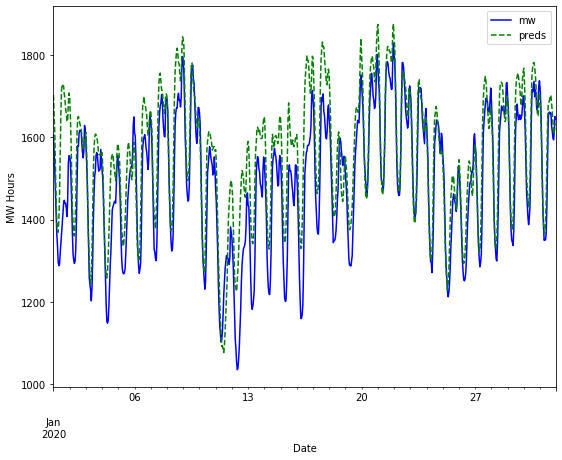

In [16]:
test_df['mw'].plot(color = 'blue', figsize=(9,7))
plt.ylabel('MW Hours')
plt.xlabel('Date')
test_df['preds'].plot(color = 'green', linestyle = 'dashed', figsize=(9,7))
plt.legend(loc="best");
plt.show()

In [17]:
test_df['APE'] = abs((test_df['mw'] - test_df['preds'])/test_df['mw'])*100
print("Naive Model MAPE is: ", test_df['APE'].mean())

Naive Model MAPE is:  5.119309890918163


In [18]:
test_df.to_csv('timeseries_test.preds.csv')

###    “Forecast” out your model by scoring your test data set with the linear regression you built. Remember, we don’t want to build a model on the test data set, just run the observations through the equation we got from the training model. These are your January 2020 predictions! Plot your predicted energy values of your test data set against the actual energy values. How do you like your forecast? 